In [2]:
import torch 
from torchvision import datasets 
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
traindata = datasets.MNIST(
      root = 'data' ,
      train = True ,
      download = True ,
      transform = ToTensor()
      ) 
testdata = datasets.MNIST(
     root = 'data' ,
     train = False , 
     transform = ToTensor()
     )
trainloader = torch.utils.data.DataLoader(
    traindata ,
    shuffle = True ,
    batch_size = 50 ,
    num_workers = 1
    )
testloader =  torch.utils.data.DataLoader(
    testdata , 
    shuffle = True ,
    batch_size = 50 , 
    num_workers = 1)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

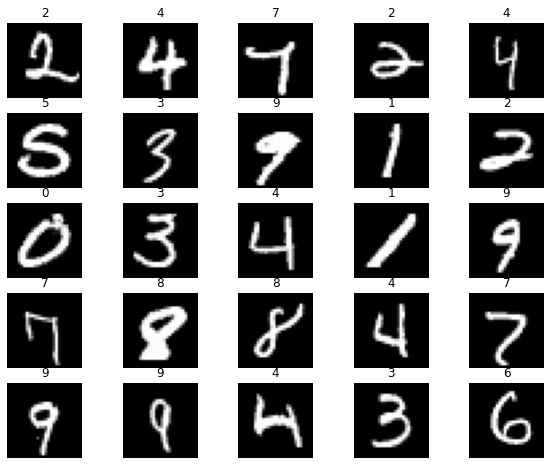

In [6]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(traindata), size=(1,)).item()
    img, label = traindata[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [9]:
seq_length = 28
input_size = 28
hidden_size = 128
num_layers =  2
num_classes = 10
batch_size =  100

class RNN(nn.Module):
  def __init__(self , input_size, hidden_size , num_layers , num_classes):
      super(RNN , self).__init__()
      self.hidden_size = hidden_size
      self.num_layers = num_layers
      self.lstm = nn.LSTM(input_size , hidden_size , num_layers , batch_first=True)
      self.fc = nn.Linear(hidden_size , num_classes)
      pass

  def forward(self,x):
      h = torch.zeros(self.num_layers, x.size(0) , self.hidden_size).to(device)
      c= torch.zeros(self.num_layers, x.size(0) , self.hidden_size).to(device)
      out , hidden = self.lstm(x, (c,h))
      out = self.fc(out[: , -1 , :])
      return out
model = RNN(input_size , hidden_size , num_layers , num_classes).to(device)



In [11]:
lossf = torch.nn.CrossEntropyLoss() 
optim = torch.optim.Adam(model.parameters() , lr=0.01)

epoch = 3 
iterations = 0 

for i in range(epoch):
  for j,(images,labels) in enumerate(trainloader):
    images = images.reshape(-1 , seq_length , input_size).requires_grad_().to(device)
    optim.zero_grad()
    output = model(images)
    labels = labels.to(device)
    loss = lossf(output,labels) 
    loss.backward()
    optim.step()
    iterations +=1

    if iterations%100 == 0:
      correct = 0
      total = 0 
      for images , labels in testloader:
        images = images.view(-1 , seq_length , input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _ , predicted = torch.max(outputs.data , 1)
        total += labels.size(0)
        correct+= (predicted == labels).sum().to(device)

      accuracy = (correct/total)*100
      print('Epoch:{}, Iteration:{}, Loss:{}, Accuracy: {}'.format(epoch, iterations, loss.item(), accuracy))
        

Epoch:3, Iteration:100, Loss:0.8645853996276855, Accuracy: 78.90999603271484
Epoch:3, Iteration:200, Loss:0.380636990070343, Accuracy: 83.23999786376953
Epoch:3, Iteration:300, Loss:0.3888150751590729, Accuracy: 91.62999725341797
Epoch:3, Iteration:400, Loss:0.3459419310092926, Accuracy: 90.43000030517578
Epoch:3, Iteration:500, Loss:0.24078091979026794, Accuracy: 94.55999755859375
Epoch:3, Iteration:600, Loss:0.4134293794631958, Accuracy: 94.8499984741211
Epoch:3, Iteration:700, Loss:0.4566323757171631, Accuracy: 94.81999969482422
Epoch:3, Iteration:800, Loss:0.09807086735963821, Accuracy: 96.01000213623047
Epoch:3, Iteration:900, Loss:0.1623331606388092, Accuracy: 96.59000396728516
Epoch:3, Iteration:1000, Loss:0.1732684075832367, Accuracy: 95.79000091552734
Epoch:3, Iteration:1100, Loss:0.044007301330566406, Accuracy: 97.1500015258789
Epoch:3, Iteration:1200, Loss:0.016187576577067375, Accuracy: 96.47000122070312
Epoch:3, Iteration:1300, Loss:0.21294070780277252, Accuracy: 96.459999

In [13]:
lossf = torch.nn.CrossEntropyLoss() 
optim = torch.optim.Adam(model.parameters() , lr=0.001)

epoch = 3 
iterations = 0 

for i in range(epoch):
  for j,(images,labels) in enumerate(trainloader):
    images = images.reshape(-1 , seq_length , input_size).requires_grad_().to(device)
    optim.zero_grad()
    output = model(images)
    labels = labels.to(device)
    loss = lossf(output,labels) 
    loss.backward()
    optim.step()
    iterations +=1
    
    if iterations%100 == 0:
      correct = 0
      total = 0 
      for images , labels in testloader:
        images = images.view(-1 , seq_length , input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _ , predicted = torch.max(outputs.data , 1)
        total += labels.size(0)
        correct+= (predicted == labels).sum().to(device)

      accuracy = (correct/total)*100
      print('Epoch:{}, Iteration:{}, Loss:{}, Accuracy: {}'.format(epoch, iterations, loss.item(), accuracy))


Epoch:3, Iteration:100, Loss:0.02960243448615074, Accuracy: 97.75999450683594
Epoch:3, Iteration:200, Loss:0.037816938012838364, Accuracy: 98.15999603271484
Epoch:3, Iteration:300, Loss:0.03077937848865986, Accuracy: 98.2199935913086
Epoch:3, Iteration:400, Loss:0.10566378384828568, Accuracy: 98.37999725341797
Epoch:3, Iteration:500, Loss:0.045936502516269684, Accuracy: 98.45999145507812
Epoch:3, Iteration:600, Loss:0.08540216088294983, Accuracy: 98.45999145507812
Epoch:3, Iteration:700, Loss:0.03976510837674141, Accuracy: 98.5999984741211
Epoch:3, Iteration:800, Loss:0.008425017818808556, Accuracy: 98.6199951171875
Epoch:3, Iteration:900, Loss:0.19239357113838196, Accuracy: 98.69999694824219
Epoch:3, Iteration:1000, Loss:0.008022384718060493, Accuracy: 98.62999725341797
Epoch:3, Iteration:1100, Loss:0.003174879588186741, Accuracy: 98.69999694824219
Epoch:3, Iteration:1200, Loss:0.016863830387592316, Accuracy: 98.65999603271484
Epoch:3, Iteration:1300, Loss:0.016630567610263824, Accura